In [1]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [2]:
# import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [4]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# divide the dataset into  independent and dependent features

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
## feature Engineering

Geography =pd.get_dummies(X['Geography'],drop_first=True)


In [8]:
Gender = pd.get_dummies(X['Gender'],drop_first = True)

In [9]:
Gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [10]:
#drop the feature of Geography and gender from X 

X = X.drop(['Geography','Gender'],axis = 1)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [12]:
#concate our encoded Geography and gender to X 
pd.concat([X,Geography,Gender],axis= 1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
Sc =StandardScaler()

In [15]:
#train test splt
from sklearn.model_selection import train_test_split 

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 0)

In [17]:
X_train =Sc.fit_transform(X_train)
X_test = Sc.transform(X_test)

In [18]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [19]:
# create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [36]:
## initalize the ANN
classifier = Sequential()

## Adding input layer

classifier.add(Dense(units=11,activation='relu'))

## first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.20))

## second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.30))

In [37]:
## create the output layers
classifier.add(Dense(1,activation='sigmoid'))

In [22]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [24]:
import tensorflow as tf
early_stopping= tf.keras.callbacks.EarlyStopping(
    monitor ="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [25]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 3ms/step - loss: 0.5311 - accuracy: 0.7669 - val_loss: 0.4600 - val_accuracy: 0.7959
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4354 - accuracy: 0.8080 - val_loss: 0.4305 - val_accuracy: 0.8133
Epoch 3/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4069 - accuracy: 0.8311 - val_loss: 0.4067 - val_accuracy: 0.8232
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3809 - accuracy: 0.8462 - val_loss: 0.3899 - val_accuracy: 0.8330
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3665 - accuracy: 0.8498 - val_loss: 0.3883 - val_accuracy: 0.8413
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3598 - accuracy: 0.8524 - val_loss: 0.3827 - val_accuracy: 0.8432
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3575 - accuracy: 0.8541 - val_loss: 0.3843 - val_accuracy:

In [26]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

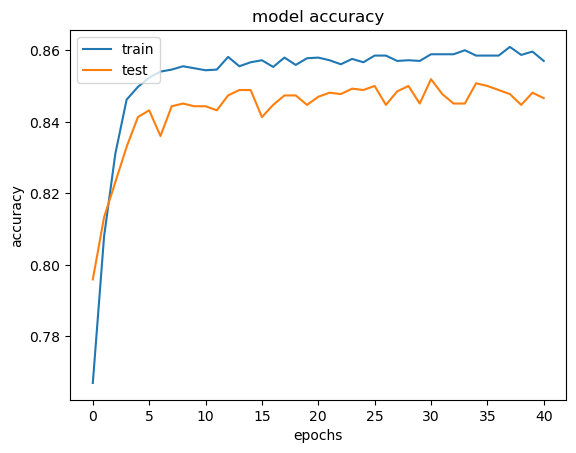

In [27]:
#summary for history
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

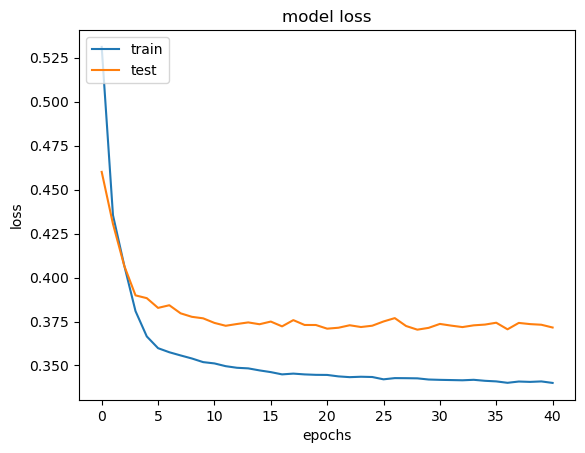

In [28]:
#summary for history
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [31]:
ypred= classifier.predict(X_test)
ypred=(ypred>0.5)

63/63 [==============================] - 0s 2ms/step


In [33]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred)
cm

array([[1537,   58],
       [ 235,  170]], dtype=int64)

In [35]:
# calculate the accuracy score
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,ypred)
score

0.8535